Wahlpflichtfach Künstliche Intelligenz II: Praktikum | [Startseite](index.ipynb) | [**<< 08 - Scikit-learn - Data Preparation**](08%20-%20Scikit-learn%20-%20Data%20Preparation.ipynb)

---

# 09 Scikit-learn - Maschinelles Lernen

[Scikit-learn](https://scikit-learn.org/stable/index.html) bietet eine Vielzahl an Algorithmen zum maschinellen Lernen an. Da wir nicht die Zeit haben uns alle im Detail anzugucken, werden wir uns nur jeweils ein paar Algorithmen aus den Bereichen Klassifizierung, Regression und Clustering angucken. Für weiter Algorithmen verweisen wir an dieser Stelle auf die [Dokumentation](https://scikit-learn.org/stable/modules/classes.html), den [Benutzerleitfaden](https://scikit-learn.org/stable/user_guide.html) und die [Tutorials](https://scikit-learn.org/stable/tutorial/index.html). Außerdem können wir auch nicht auf die dahinterliegende Mathematik eingehen.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets

## Decision Tree
[Decision Trees](https://scikit-learn.org/stable/modules/tree.html#tree) (Entscheidungsbäume) sind eine überwachte Lernmethode, die für Klassifizierung und Regression verwendet wird. Das Ziel ist es, ein Modell zu erstellen, das den Wert einer Zielvariablen durch das Lernen einfacher Entscheidungsregeln, die aus den Features abgeleitet werden, vorhersagt.

__Vorteile:__
- Einfach zu verstehen und zu interpretieren
- Fast keine Datenvorverarbeitung notwendig

__Nachteile:__
- Eventuell keine gute Generalisierung (overfitting)
- Entscheidungsbäume sind meistens sehr unstabil, da kleine Änderungen in den Daten eventuell einen vollkommen anderen Baum erzeugen

### Klassifizierung mit Decision Trees
Der [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) ist in der Lage, eine Mehrklassen-Klassifizierung für einen Datensatz durchzuführen. Dazu müssen an dem Objekt die Merhode `fit()`nur mit den Daten und Labels aufgerufen werden.

In [2]:
from sklearn import tree
iris = datasets.load_iris()

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(iris.data, iris.target)

DecisionTreeClassifier()

Anschließend ist es möglich Vorhersagen zu treffen.

In [3]:
dt_clf.predict([[5.1 , 3.4, 1.3, 0.3]])

array([0])

In [4]:
dt_clf.predict([[6.5, 3.2 , 5.2 , 1.7],])

array([1])

In [5]:
dt_clf.predict([[6.4, 2.7, 5.3, 2.4]])

array([2])

Um sich den Entscheidungsbaum anzeigen zu lassen kann die Funktion [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree) verwendet werden.

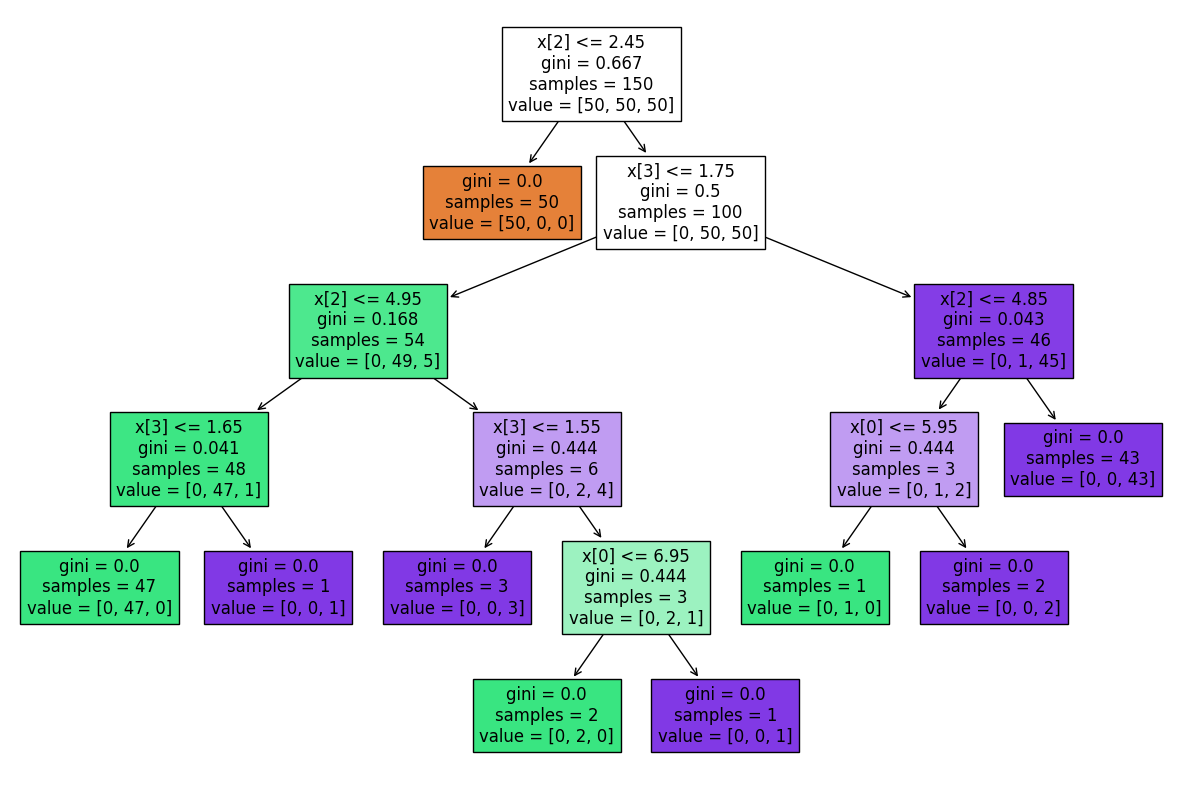

In [6]:
plt.figure(figsize=(15, 10))
_ = tree.plot_tree(dt_clf, filled=True)

Auch den Decision Tree kann man selbstverständlich parametrisieren. So kann zum Beispiel mit dem Parameter `max_depth` die maximale Tiefe des Baumes angegeben werden und mit dem Parameter `criterion` kann die Funktion zur Messung der Qualität eines Splits bestimmt werden. Je nach gewählten Parametern ergibt sich dann ein anderer Entscheidungsbaum.

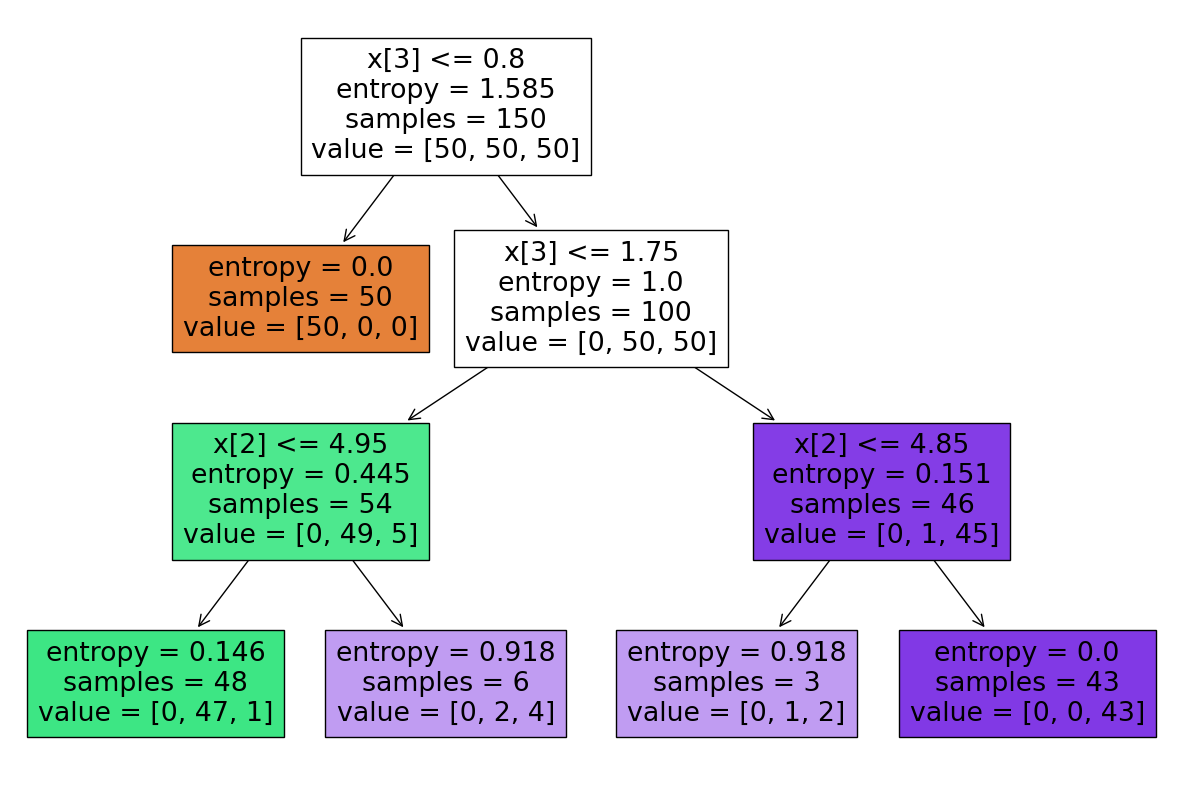

In [7]:
different_dt_clf = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy')
different_dt_clf.fit(iris.data, iris.target)

plt.figure(figsize=(15, 10))
_ = tree.plot_tree(different_dt_clf, filled=True)

### Regression mit Decision Trees
Decision Trees können auch auf Regressionsproblemen angewendet werden. Dafür stellt sklearn die Klasse [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) bereit.

In [8]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [9]:
# Fit two regression models
regr_1 = tree.DecisionTreeRegressor(max_depth=2).fit(X, y)
regr_2 = tree.DecisionTreeRegressor(max_depth=5).fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

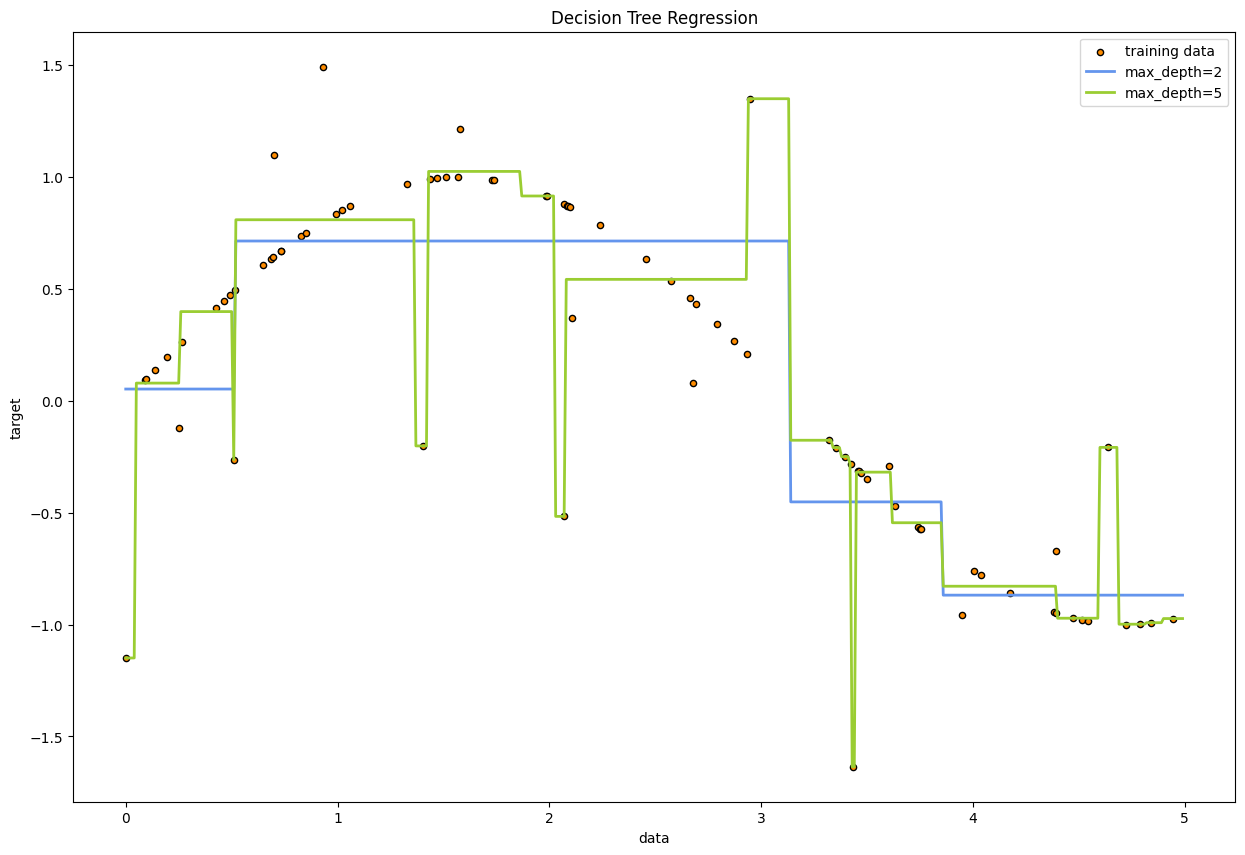

In [10]:
# Plot the results
plt.figure(figsize=(15, 10))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="training data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

__Aufgaben:__
<details>
<summary>a) Welcher Regressor bildet die Daten besser ab und warum?</summary>
Der Regressor mit einer maximalen Tiefe von 2 bildet die Daten besser ab, da der tiefere Baum overfitted. 
</details>
<details>
<summary>b) Was könnte ein Problem mit dem Decision Tree Regressor sein?</summary>
Der Decision Tree Regressor bildet keinen kontunuierlichen Raum ab. Dadurch ist er für viele Regressionsprobleme eventuell nur bedingt zu gebrauchen.
</details>

Den Entscheidungsbaum für Regressionsproblem kann man sich auch mit der Funktion `plot_tree` anzeigen lassen.

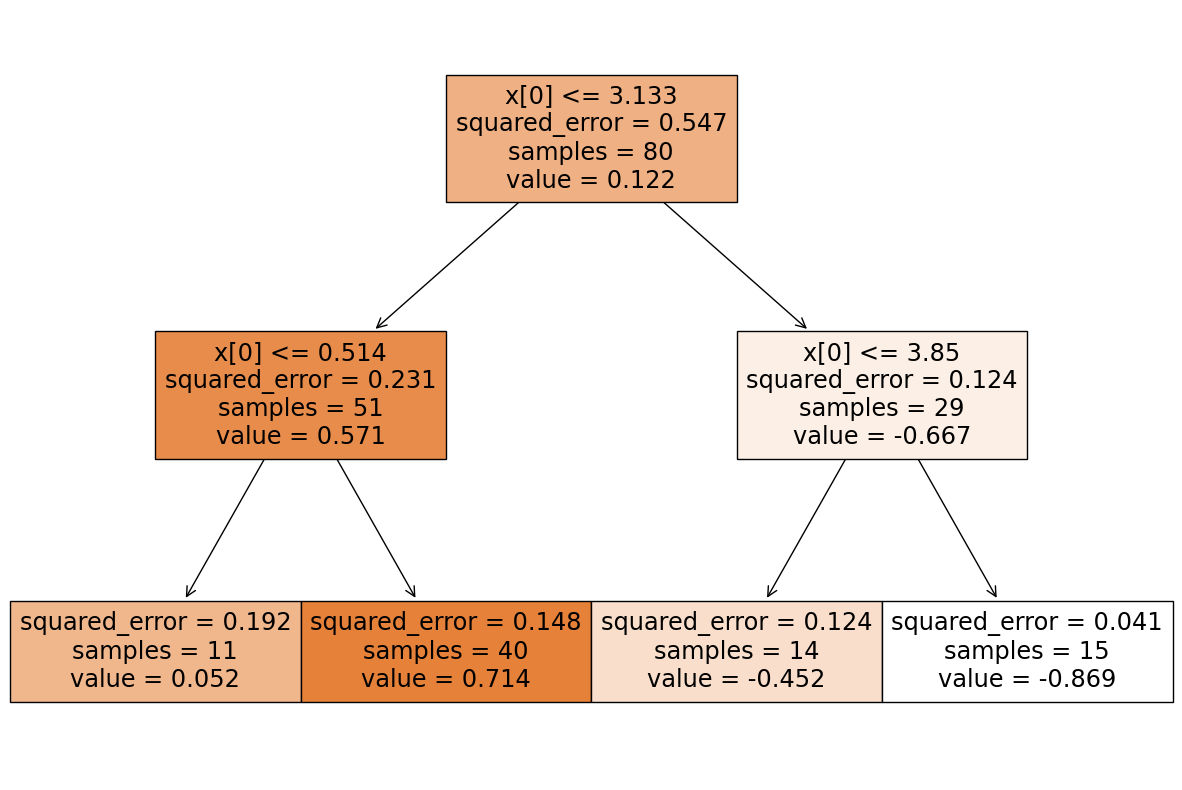

In [11]:
plt.figure(figsize=(15, 10))
_ = tree.plot_tree(regr_1, filled=True)

Auch den Regressor kann man wieder mit verschiedenen Parametern anpassen. Zum Beispiel kann man mit `min_samples_leaf` angeben wie viele Datenpunkte mindestens in einem Blatt des Baumes sein müssen. 

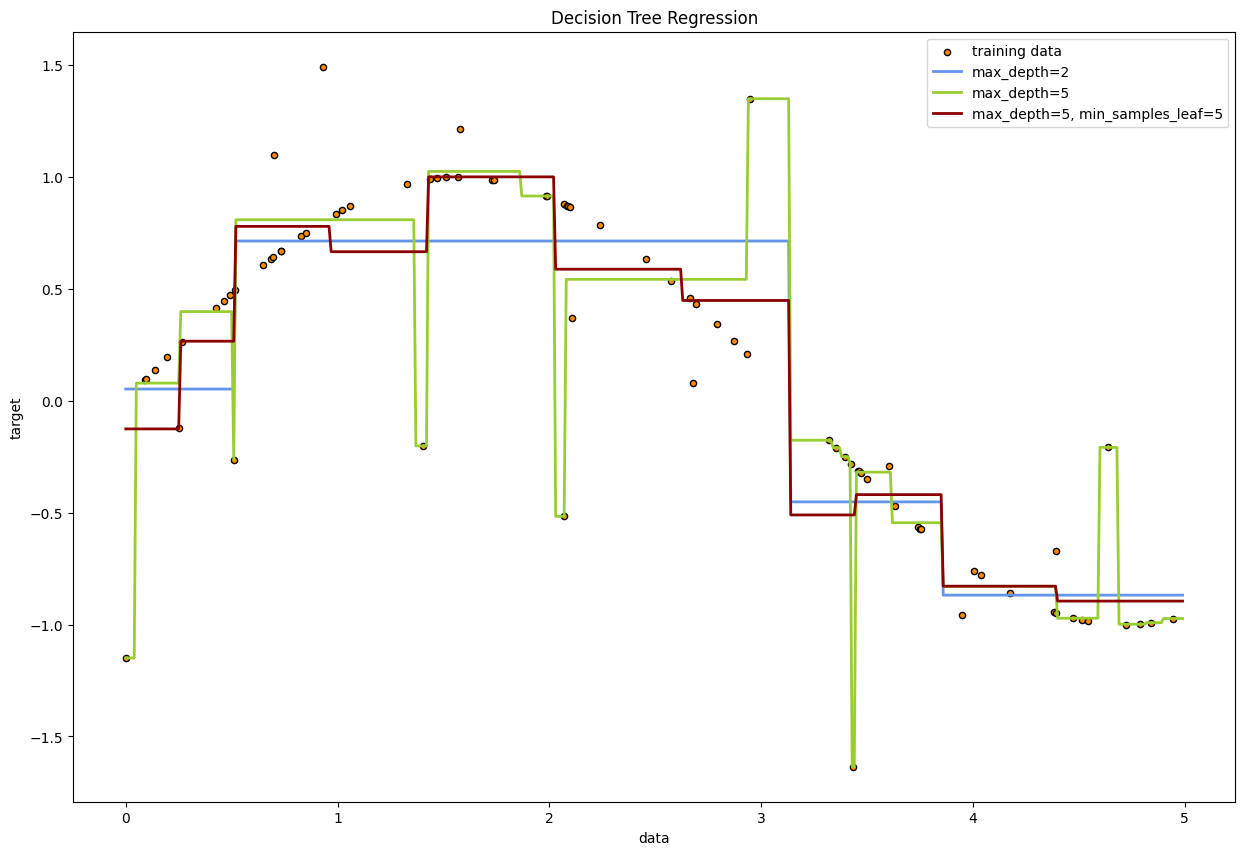

In [12]:
regr_3 = tree.DecisionTreeRegressor(max_depth=5, min_samples_leaf=5).fit(X, y)
y_3 = regr_3.predict(X_test)
# Plot the results
plt.figure(figsize=(15, 10))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="training data")
for y_predicted, color, label in zip((y_1, y_2, y_3), 
                                     ("cornflowerblue", "yellowgreen", "darkred"), 
                                     ("max_depth=2", "max_depth=5", "max_depth=5, min_samples_leaf=5")):
    plt.plot(X_test, y_predicted, color=color, label=label, linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Random Forest
Der Random Forest ist ein Algorithmus der nach dem Perturb-and-Combine-Verfahren arbeitet. Das bedeutet, dass durch die Einführung von Zufälligkeit in die Klassifikatorenkonstruktion ein vielfältiger Satz von Klassifikatoren erzeugt wird. Die Vorhersage des Kollektives wird als die gemittelte Vorhersage der einzelnen Klassifikatoren angegeben.

In einem Random Forest sind also viele Decision Trees gesammelt, die alle einen Wert hervorsagen. Im Anschluss werden dann all diese Vorhersagen genommen um eine einzelne Vorhersage zu treffen.

Für die Klassifizierung wird die Klasse [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) verwendet.

In [12]:
from sklearn.ensemble import RandomForestClassifier

# construct a random forest with 3 trees and each tree is trained with maximal 80% of the data
random_forest = RandomForestClassifier(n_estimators=3, max_samples=0.8).fit(iris.data, iris.target)
random_forest

RandomForestClassifier(max_samples=0.8, n_estimators=3)

In [13]:
random_forest.predict([[5.1 , 3.4, 1.3, 0.3]])

array([0])

Visualisierung der unterschiedlichen Entscheidungsbäume.

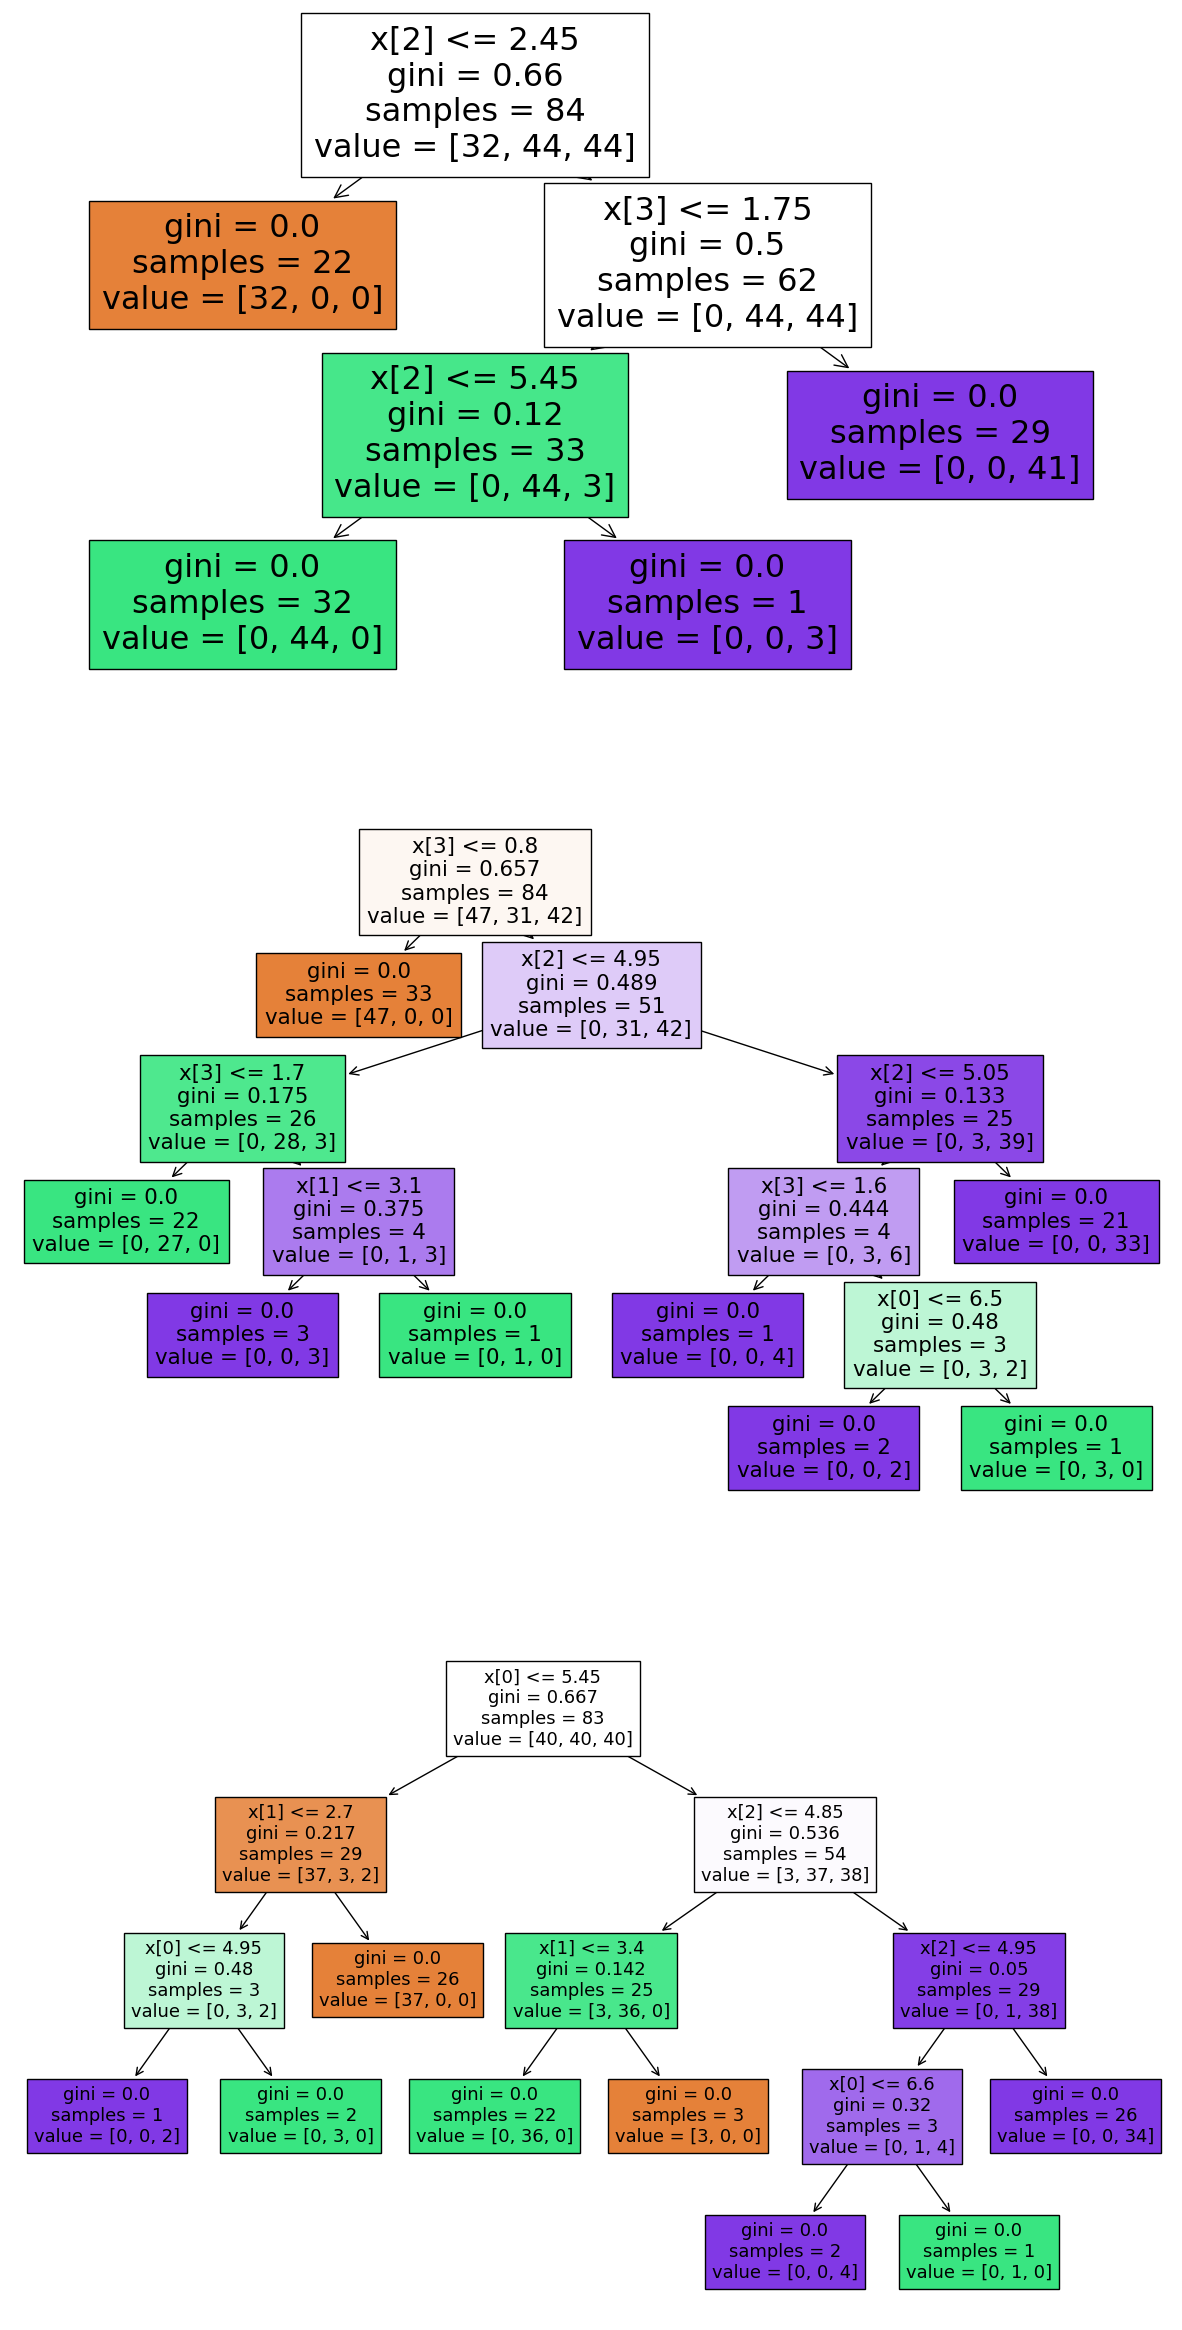

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 30))
for axis, dt in zip((ax1, ax2, ax3), random_forest.estimators_):
    _ = tree.plot_tree(dt, filled=True, ax=axis)

Auch für Regressionprobleme kann ein Random Forest verwendet werden. Dafür gibt es die Klasse [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

## Support-Vektor-Maschinen
[Support-Vektor-Maschinen](https://scikit-learn.org/stable/modules/svm.html) (SVMs) sind eine Reihe von überwachten Lernmethoden, die für Klassifizierung, Regression und Ausreißererkennung verwendet werden. 

__Vorteile:__
- Effektiv in hochdimensionalen Räumen.
- Immer noch effektiv in Fällen, in denen die Anzahl der Dimensionen größer ist als die Anzahl der Datenpunkte.
- Sehr gute Speichereffizient, da nur ein Bruchteil der Trainingsdaten gespeichert wird (Support Vektoren)

__Nachteile:__
- SVMs geben Wahrscheinlichkeiten nicht direkt aus
- Gefahr für overfitting, wenn die Anzahl der Feature viel größer ist als die Anzahl der Datenpunkte.

### Klassifizierung mit Support-Vektor-Maschinen

Im Falle der Klassifizierung versucht die SVM die Datenpunkte so in Klassen zu unterteilen, dass um die Klassengrenzen ein möglichst breiter Bereich frei von Objekten bleibt. In der nachfolgenden Abbildung unterteilen zwar beide Linien die Klassen, aber die Linie _A_ hat einen deutlich größeren Freiraum.

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Svm_intro.svg">

Zum Trennen der Daten wird je nach Daten ein andere Kernel benötigt. Im linken Teil der Abbildung sind die Klassen linear trennbar im rechten Teil hingegen nicht. Daher würde es dort auch keinen Sinn ergeben, einen linearer Kernel zu verwenden.

<img src="https://upload.wikimedia.org/wikipedia/de/a/a0/Diskriminanzfunktion.png">

In sklearn steht mit [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) eine Klasse zur Verfügung, die verschiedene Kernel implementiert. Eine ausführlichere Erklärung zu SVM und den unterschiedlichen Parametern finden sie [hier](https://www.ancud.de/support-vector-machine-svn/).

In [15]:
from sklearn import svm

# we just use 2 dimensions here because we want to visualize the result
X = iris.data[:, [2, 1]]
y = iris.target

models = (svm.SVC(kernel='linear', C=1), svm.SVC(kernel='rbf', C=1, gamma=.7))
models = (clf.fit(X, y) for clf in models)

In [16]:
# define helper functions
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

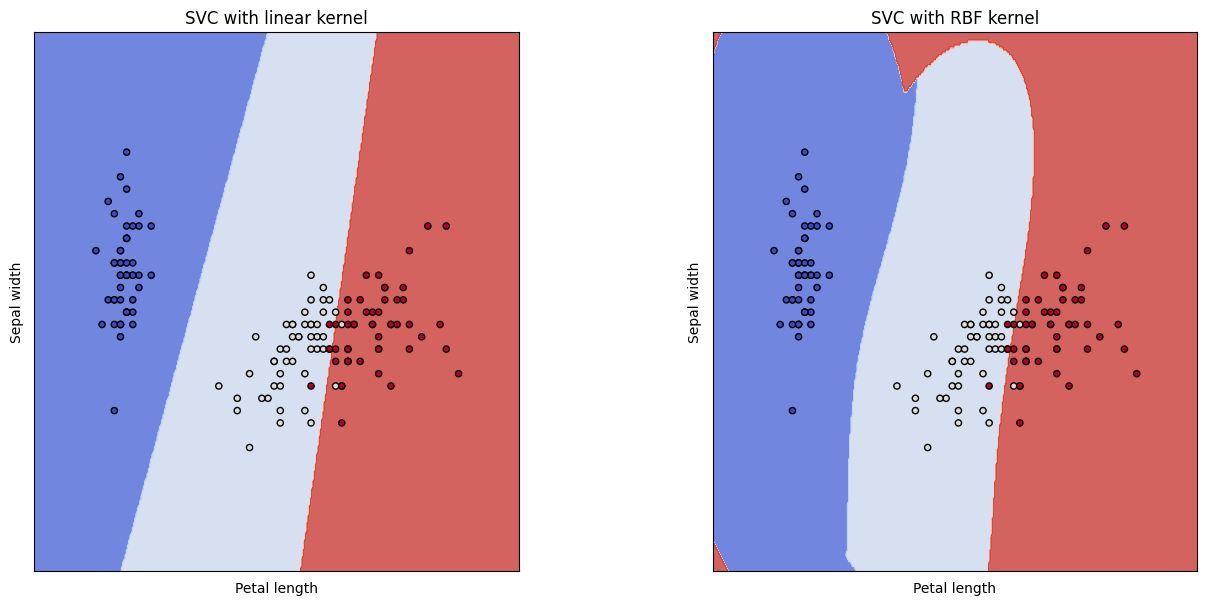

In [18]:
# title for the plots
titles = ('SVC with linear kernel',
          'SVC with RBF kernel')

# Set-up 1x2 grid for plotting.
fig, sub = plt.subplots(1, 2, figsize=(15, 7))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)


## k-means
Der [KMeans]()-Algorithmus clustert Daten, indem er versucht, die Datenpunkte in $n$ Gruppen gleicher Varianz zu trennen und dabei ein Kriterium zu minimieren, das als Trägheit oder within-cluster sum-of-squares bekannt ist. Es handelt sich dabei um ein unüberwachtes Lernverfahren.

$$\sum_{i=0}^{n}min_{\mu_j \in C}(\lVert x_i - \mu_j \rVert^2) $$ 

Grob durchläuft der Algorithmus dabei die folgenden Schritte:
1. Auswahl der $n$ initialen Schwerpunkte $C$. Häufig sind dies einfach zufällige Punkte aus den Trainingsdaten.
2. Aufteilung der Trainingsdaten auf die einzelnen Schwerpunkte anhand des obigen Kriteriums. 
3. Die neuen Clusterschwerpunkte berechnen. Diese ergeben sich aus dem Mittelwert aller Datenpunkte, die dem Cluster zugewiesen sind.
4. Wenn die Veränderung der Schwerpunkte größer als ein Schwellenwert ist, Schritt 2 wiederholen. Wenn nicht, wurden die Clusterschwerpunkte gefunden.

### Dummy-Daten erstellen

In [17]:
# create 50 samples for each of the 3 centers
x, y = datasets.make_blobs(n_samples=1500, centers=3, random_state=42)

### Clustering mit KMeans

In [18]:
from sklearn.cluster import KMeans

# create a KMeans object that searches for 3 clusters 
km_clustering = KMeans(n_clusters=3, random_state=42)
km_clustering

KMeans(n_clusters=3, random_state=42)

/home/delta/project/education/lectures/hsw/wpf-ii-ss2023/venv/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


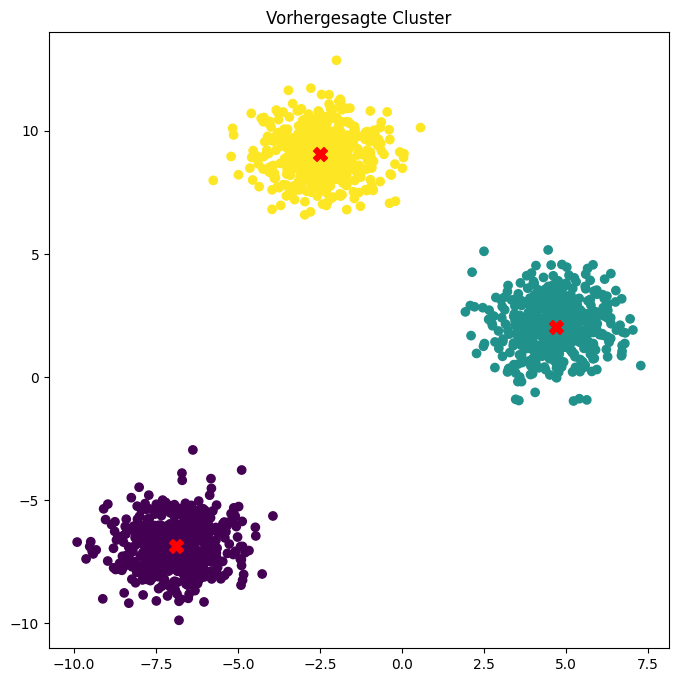

In [19]:
# Predict the clusters
y_pred = km_clustering.fit_predict(x)

# Visualize the result
plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
# plot centroids
plt.scatter(km_clustering.cluster_centers_[:, 0], 
            km_clustering.cluster_centers_[:, 1], 
            marker='X', c='red', s=100)
_ = plt.title("Vorhergesagte Cluster")

/home/delta/project/education/lectures/hsw/wpf-ii-ss2023/venv/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


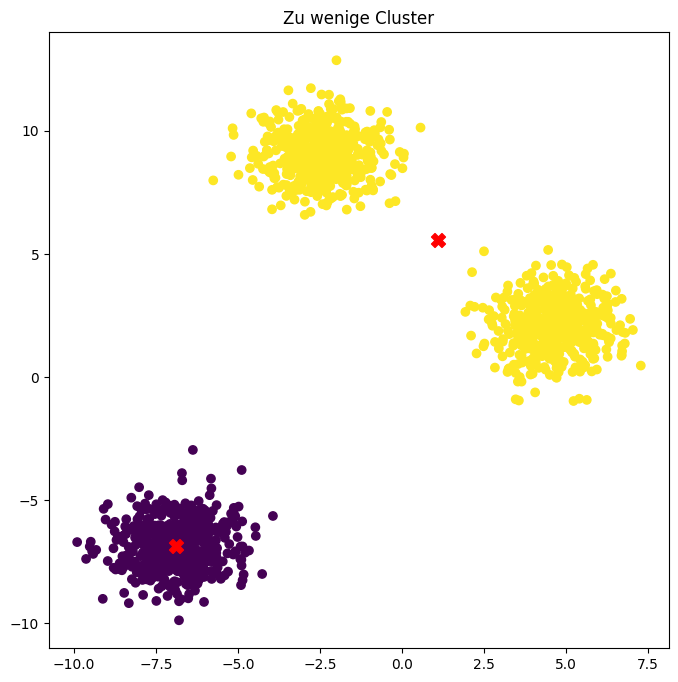

In [20]:
# let's check what happens if we take two instead of 3 clusters
km_clustering = KMeans(n_clusters=2, random_state=42)
y_pred = km_clustering.fit_predict(x)

# Visualize the result
plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
# plot centroids
plt.scatter(km_clustering.cluster_centers_[:, 0], 
            km_clustering.cluster_centers_[:, 1], 
            marker='X', c='red', s=100)
_ = plt.title("Zu wenige Cluster")

/home/delta/project/education/lectures/hsw/wpf-ii-ss2023/venv/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


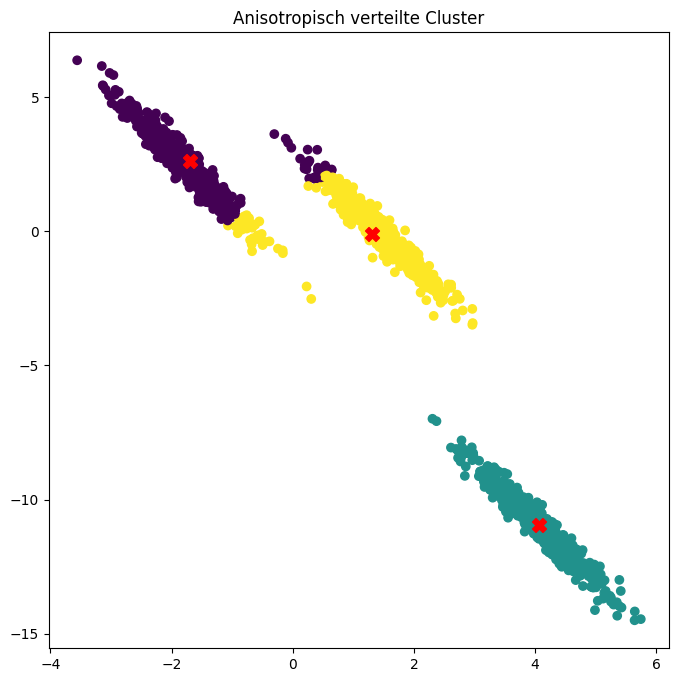

In [21]:
# transform the data
transformation = [[-0.50834549, 0.93667341], [0.30887718, -0.95253229]]
x_aniso = np.dot(x, transformation)

# let's fit our algorithm
km_clustering = KMeans(n_clusters=3, random_state=42)
y_pred = km_clustering.fit_predict(x_aniso)

# Visualize the result
plt.figure(figsize=(8, 8))
plt.scatter(x_aniso[:, 0], x_aniso[:, 1], c=y_pred)
# plot centroids
plt.scatter(km_clustering.cluster_centers_[:, 0], 
            km_clustering.cluster_centers_[:, 1], 
            marker='X', c='red', s=100)
_ = plt.title("Anisotropisch verteilte Cluster")

/home/delta/project/education/lectures/hsw/wpf-ii-ss2023/venv/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


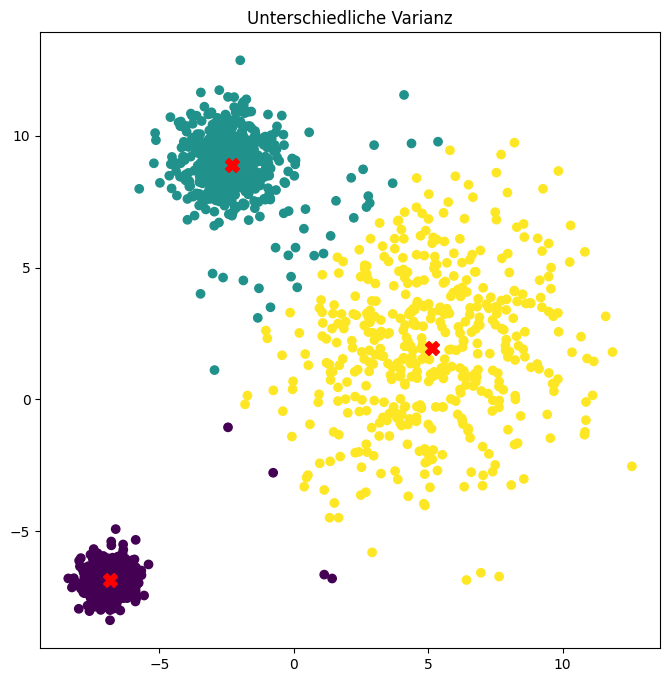

In [22]:
# Different variance
x_varied, y_varied = datasets.make_blobs(n_samples=1500, cluster_std=[1.0, 3., 0.5], random_state=42)

# let's fit our algorithm
km_clustering = KMeans(n_clusters=3, random_state=42)
y_pred = km_clustering.fit_predict(x_varied)

# Visualize the result
plt.figure(figsize=(8, 8))
plt.scatter(x_varied[:, 0], x_varied[:, 1], c=y_pred)
# plot centroids
plt.scatter(km_clustering.cluster_centers_[:, 0], 
            km_clustering.cluster_centers_[:, 1], 
            marker='X', c='red', s=100)
_ = plt.title("Unterschiedliche Varianz")

## Verwendung in Pipelines
Selbstverständlich können die ML-Algorithmen auch zu einer Pipeline hinzugefügt werden. Dies geht allerdings nur, wenn der Algorithmus als letzter Schritt hinzugefügt wird.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# create some dummy data
X, y = datasets.make_classification()
X_train, X_test, y_train, y_test = train_test_split(X, y)

# First, scale the input, then, classify it with a SVM
pipe = Pipeline([('scaler', StandardScaler()), ('svc', svm.SVC())])
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.92

## Generelle Funktionsweise
Wie Ihr bestimmt bereits bemerkt habt sind die Schritte immer wieder die gleichen:
1. __Konstruktor:__ Erstellen des ML-Algorithmus. Die meisten Algorithmen können in diesem Schritt parametrisiert werden.
2. __fit():__ Training des ML-Algorithmus. Wenn es ein überwachts Lernverfahren ist, wird der Methode neben den Daten auch die Zielwerte (Label oder Zahlenwert) übergeben. Für ein unüberwachtes Lernverfahren werden nur die Daten übergeben.
3. __predict():__ Mit der `predict()`-Methode kann der ML-Agorithmus anschließend Vorhesagen für die übergebenen Werte treffen

## Welchen Algorithmus soll ich nehmen?
Es gibt nicht den einen Algorithmus der für alle Anwendungsfälle geeignet ist. Welcher Algorithmus in Frage kommt hängt von der Art des Problems (Klassifizierung, Regression, Clustering), der Datenmenge, den Datentypen und noch weiteren Faktoren ab. Scikit-learn bietet die folgende [Übersicht](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) an, um einen ersten Ansatzpunkt zu haben. 
<img src="https://scikit-learn.org/stable/_static/ml_map.png">

---

Wahlpflichtach Künstliche Intelligenz II: Praktikum | [Startseite](index.ipynb) | [**>> 10 Scikit-learn - Modellauswahl**](10%20-%20Scikit-learn%20-%20Modellauswahl.ipynb)